<hr style="height:2px;border:none"/>
<h1 align='center'> <img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />

INF-395 / 477 / 577 Tarea 2 Redes Neuronales Artificiales - 2020-2 </h1>

<H3 align='center'> Integrantes: Paula Nieto - Gabriela Sepúlveda </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en tensorflow, keras, pandas y numpy
* Recurrent Neural Networks
* LSTM, GRU
* Autoencoders
* GAN

**Formalidades**  
* Equipos de trabajo de 2 personas (*Ambos estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos). Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno para toda la tarea, con tal de que todos los entregables estén bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_ ( en caso de ser repositorio privado, invitar como colaborador al usuario de github "Aerlio") al correo electrónico del ayudante (*<tomas.ochoa.14@sansano.usm.cl>*), en copia al profesor (*<cvalle@inf.utfsm.cl>*). Especificar el siguiente asunto: [INF395/477/577-2020 Tarea 2]
* Fecha de entrega y presentaciones: 8 de Enero. Hora límite de entrega: 23:00. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail. 

<hr style="height:2px;border:none"/>

La tarea se divide en tres partes:

[1.](#primero) RNNs para series de tiempo  <br>
[2.](#segundo) RNNs para texto <br>
[3.](#tercero) Autoencoders para imágenes <br>
[3.](#cuarto) GANs para imágenes <br>

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo solo son guías y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con comentarios y con celdas _Markdown_ con los comentarios de la pregunta y con cualquier analisis, fórmula o explicación que les parezca relevante para justificar sus procedimientos. 
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará mucho la elección en si, en cambio la argumentación detrás de la elección será lo más ponderado.

**Es ÁLTAMENTE recomendado realizar esta tarea en _Colab_ de Google (https://colab.research.google.com/notebooks/intro.ipynb#recent=true), con el fin de no depender del rendimiento de su computador personal al momento de entrenar redes neuronales y poder compartir de forma fácil sus avances con su compañer@ de trabajo.** Si bien conlleva sus pros y contras utilizar _Colab_ , existirá una curva de aprendizaje personal que lo ayudará a sacar el mayor provecho a esta herramienta, por ejemplo aprendiendo a guardar los avances realizados, evitando tener que ejecutar todo el código cada vez que se abra _Colab_ . *Tip: Una vez abierto un notebook en _Colab_ ir a **entorno de ejecución**->**Cambiar tipo de entorno de ejecución**, y seleccionár TPU como acelerador por hardware para redes recurrentes y GPU para redes convolucionales.*.

# 3. Autoencoders en Fashion MNIST

Si bien las redes neuronales han tenido desempeños sorprendentes en muchas áreas donde antes solo un ser humano podía alcanzar buenos desempeños, uno de sus desventajas suele serla alta dimensionalidad de los espacios de hipótesis. En la práctica, esto implica que para aprender una tarea predictiva con alguna capacidad de generalización, se requieren grandes bases de datos etiquetadas. Esto implica un problema, considerando que al momento de buscar la base de datos, no se tiene a priori una manera de automatizar esta etiquetación. Esta necesidad de gran cantidad de trabajo de clasificación realizado por humanos, ha engendrado soluciones ingeniosas, como la aproximación de _Facebook_ hace algunos años de pedirle a los mismos usuarios que etiquetaran a las personas en sus fotos, o la solución de _Amazon_, _Mechanical Turk_, donde cualquier usuario puede realizar tareas repetitivas de clasificación a cambio de dinero real, o por otro lado cualquier persona puede comprar la etiquetación de una base de datos la cual realizan varias personas en cualquier parte del mundo. 

Otra aproximación, quizás aún más ingeniosa, para solucionar el problema de las etiquetas, es utilizar las bases de datos sin preocuparse de sus etiquetas. Esta aproximación de aprendizaje no supervisado tiene su representante en redes neuronales en los _Autoencoders_, redes que utilizan el mismo input como target y buscan representaciones de menor dimensionalidad al interior de la red. Estas redes han permitido el uso de cantidades masivas de datos para aprender de ellos sin necesidad de tener etiquetas. Durante esta pregunta veremos algunos de los aspectos y posibilidades básicas que nos presentan los _autoencoders_, utilizando una base de datos de imágenes de articulos de vestimenta, el Fashion MNIST. 

## 3.a) Carga de datos y visualizaciones
Cargue los datos. Puede user las funciones de `keras.datasets` como muestra el código o descargarlo manualmente. 

Luego, visualice algunas imagenes de cada una de las catégorias junto con sus nombres (investigue un poco para encontrar la codificación de `y`). Note que las imagenes deben representarse en blanco y negro, puede usar `cmap='Greys'`. ¿Qué pares de categorías cree podrían ocasionar problemas al momento de clasificación? ¿Qué tan bien cree que se desempeñaría un humano en esta tarea?

In [1]:
from keras.datasets import fashion_mnist
(x_tr,y_tr),(x_val,y_val) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


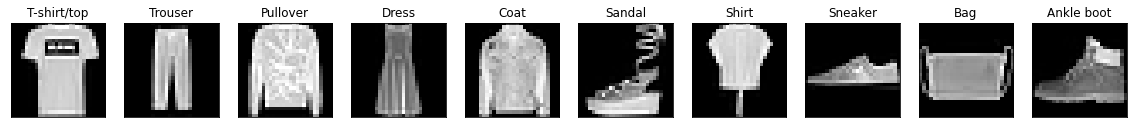

In [2]:
import matplotlib.pyplot as plt
import numpy as np
y = { 0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 
     5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
  clothes = np.where(y_tr == i)[0][i]
  ax = plt.subplot(1, n, i + 1)
  plt.imshow(x_tr[clothes])
  plt.title(y[y_tr[clothes]])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.gray()
plt.show()

**Respuesta**

¿Qué pares de categorías cree podrían ocasionar problemas al momento de clasificación? 

Los pares de categorías que creo que podrían confundirse son los zapatos, como sandals, sneakers y ankle boots.
Además, los polerones con manga larga como pullovers y coats.
Y por último, por las dimensiones se podrían confundir trousers y dresses.

¿Qué tan bien cree que se desempeñaría un humano en esta tarea?

Si conoce las diferencias entre la ropa puede que desempeñe muy bien la tarea, aún así cometiendo errores pero creo que no es tan fácil para la mayoría de los humanos porque requiere conocer detalles de categorización de la ropa, como la diferencia entre ciertos tipos de polerones o pantalones.

## 3.b Posibilidades de preprocesamiento y pequeños análisis. 

Las primeras redes que entrenaremos utilizarán arquitecturas _fully connected_, por lo cual también es necesario transformar nuestras imagenes 2-dimensionales a vectores, como muestra el ejemplo de código.

**Preguntas:**

i) ¿Cuáles son los rangos de valores de `x`? ¿Por qué?

ii) ¿Las distintas clases de ejemplos están balanceadas?

iii) ¿Considera necesario realizar un preprocesamiento? Escale los valores de `x` al intervalo $[0,1]$, y guarde el conjunto de datos original de igual manera que el escalado. ¿Se pierde información al realizar este preprocesamiento? 


In [3]:
x_tr_vector = x_tr.reshape(-1,28*28)
x_val_vector = x_val.reshape(-1,28*28)

#Verificación
counter_tr, counter_val = np.zeros(10), np.zeros(10)
for clothes_tr in y_tr:
      counter_tr[clothes_tr] += 1
print("Proporción del conjunto de entrenamiento ", counter_tr)
for clothes_val in y_val:
      counter_val[clothes_val] += 1
print("Proporción del conjunto de validación ", counter_val)

# Transforma la escala de las imágenes
x_train_vector_scaled = x_tr_vector.astype('float32') /255.0 
x_val_vector_scaled = x_val_vector.astype('float32') /255.0
print("número escalado: ", x_train_vector_scaled[0][100])

print("Shape de x_tr previo: ", x_tr.shape)
print("Shape de x_tr: ", x_train_vector_scaled.shape)

Proporción del conjunto de entrenamiento  [6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000.]
Proporción del conjunto de validación  [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
número escalado:  0.28627452
Shape de x_tr previo:  (60000, 28, 28)
Shape de x_tr:  (60000, 784)


**Respuestas**

i) ¿Cuáles son los rangos de valores de `x`? ¿Por qué?

Antes de la transformación los rangos son (60.000, 28, 28), esto significa 60.000 imágenes de 28x28 pixeles en la escala del gris, luego de la transformación los rangos son (60.000, 784), ahora los pixeles están en un vector de una dimensión porque es necesario para utilizar la arquitectura fully connected (no hay relación espacial entre los vectores).

ii) ¿Las distintas clases de ejemplos están balanceadas?

Si, todas las clases tienen la misma proporción, 6.000 muestras cada uno.

iii) ¿Considera necesario realizar un preprocesamiento? ¿Se pierde información al realizar este preprocesamiento? 

Si, el prepocesamiento es necesario para ver que los datos estén correctos. Por ejemplo, un desbalance en las clases puede perjudicar el aprendizaje ya que pueden haber objetos que no se intenten clasificar, es decir, si no hay suficientes vestidos, la red no clasificará como vestidoa un objeto que claramente lo es.

En este preprocesamiento si se pierde información debido a que las imágenes tienen una relación espacial debido a la ubicación de los píxeles, y al transformalo a un vector, esa relación se pierde. Además, transformar el intervalo de [0, 255] a [0, 1] también afecta ya que los valores resultantes tienen muchos decimales, por lo que puede perderse información de los colores de la imagen.

## 3.c) Primer Autoencoder

Entrenaremos un primer autoencoder de una capa oculta, usando arquitectura densa. Para esto, utilize como guía los códigos presentados abajo. 

Utilice en primera instancia su conjunto de datos escalados. Considerando el intervalo de los datos escalados.

Entrene esta primera red utilizando pérdida _binary cross entropy_. Compare luego las imagenes originales con las imagenes reconstruidas, como muestra el código. **Grafique** como varia la pérdida a lo largo del entrenamiento y visualice algunas imagenes reconstruidas. 

**Preguntas:**

i) ¿Qué función de activación correspondería a la capa de salida de la red? ¿Debería afectar la elección de la función de activación de la capa oculta? 

ii) ¿Qué le parece el desempeño de la red, logra aprender la tarea en su opinion?

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


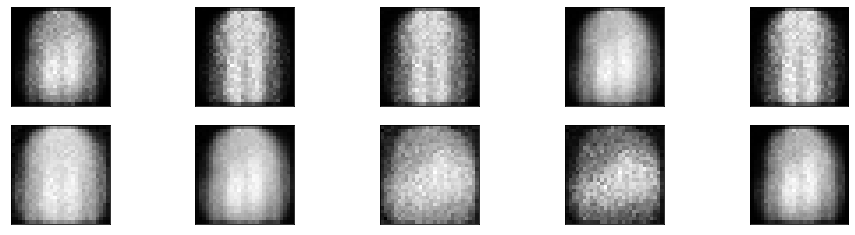

In [4]:
from keras.layers import Dense
from keras.optimizers import SGD
from keras.models import Sequential

autoencoder = Sequential()

autoencoder.add(Dense(32,activation='relu')) # encoder

autoencoder.add(Dense(28*28,activation= 'sigmoid')) #decoder

autoencoder.compile(optimizer=SGD(lr=0.002),loss='binary_crossentropy')
history = autoencoder.fit(x_train_vector_scaled,x_train_vector_scaled,epochs=50,validation_data=(x_val_vector_scaled,x_val_vector_scaled),verbose=False)
autoencoder.summary()

plt.rcParams["figure.figsize"]=[16,4]
ix = 1
for u in range(5):
  for v in range(2):
    ax = plt.subplot(2,5,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(autoencoder.predict(x_val_vector_scaled)[ix].reshape(28,28))
    ix += 1
plt.show()

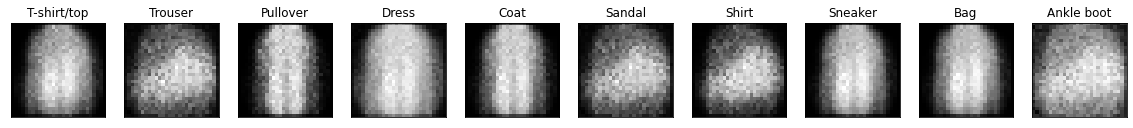

In [5]:
plt.figure(figsize=(20, 4))
for i in range(n):
  clothes = np.where(y_tr == i)[0][i]
  ax = plt.subplot(1, n, i + 1)
  plt.imshow(autoencoder.predict(x_val_vector_scaled)[clothes].reshape(28,28))
  plt.title(y[y_tr[clothes]])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.gray()
plt.show()

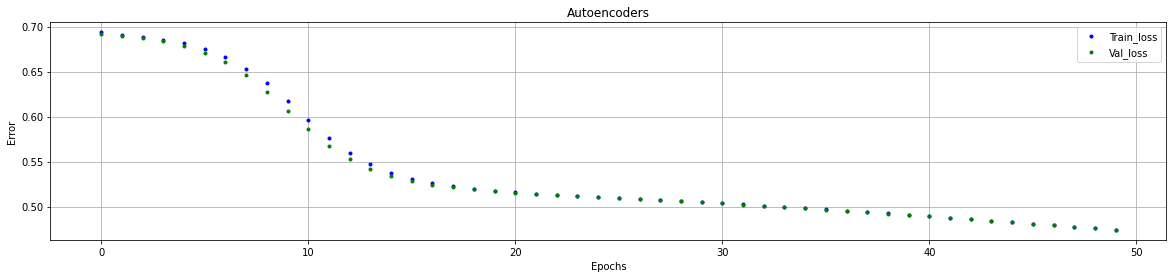

In [6]:
plt.rcParams["figure.figsize"]=[20,4]

# Primer Autoenconder
plt.subplot(1,1,1)
plt.title("Autoencoders")
plt.plot(history.history["loss"],"b.",label="Train_loss")
plt.plot(history.history["val_loss"],"g.",label="Val_loss")
plt.xlabel("Epochs"),plt.ylabel("Error")
plt.legend(),plt.grid()

plt.show()

**Respuestas**

i) ¿Qué función de activación correspondería a la capa de salida de la red? ¿Debería afectar la elección de la función de activación de la capa oculta?

Debido a que se utiliza binary cross entropy, la respuesta será 0 o 1, siendo así una clasificación, por lo que la función de activación de la salida que se recomienda es la sigmoidal para la capa de salida, ya que está dentro del rango [0, 1], sin embargo, para la capa oculta no debería influir demasiado la elección, por lo que se utilizó relu, ya que tiene mejor resultado que otra capa sigmoid.

ii) ¿Qué le parece el desempeño de la red, logra aprender la tarea en su opinion?

Por las imágenes pareciera que no logra aprender la tarea, ya que están irreconocibles (mezcladas) o la ropa es mal clasificada como se muestra en el segundo grupo de imágenes. Esto puede deberse a que se utilizan muy pocas neuronas (se comprime mucho la imagen), y por lo tanto, está sobreajustando. 

Además, se analizó con el optimizador Adam y la calidad de la imagen mejoró, por lo que puede haber un problema de gradiente desvaneciente ligado a SGD, aunque la clasificación seguía siendo errónea.

**Comentarios**

Las imágenes obtenidas son de peor calidad que las que se tenían, esto se debe al optimizador que se usa, ya que como se mencionó anteriormente, usando Adam se logró una calidad tan buena como al comienzo, pero sin mejorar la clasificación.


## 3.d) Dimensionalidad

Una forma de interpretar lo que realiza el autoencoder, es considerar que si el autoencoder hace bien su tarea, la información necesaria para reconstruir la imagen original se encuentra en la capa oculta, la cual tiene menor dimensionalidad que la imagen original. Uno puede considerar por lo tanto que la capa de _encoding_ esta comprimiendo la información contenida en la imagen, mientras la capa de _decoding_ hace el proceso contrario, descomprimiendola a su estado original lo mejor posible. 

Explore como cambia el desempeño de la red en cuestión frente a cambios en la dimensión de la capa oculta. Pruebe a lo menos 5 niveles de compresión distintos, incluyendo uno donde la capa oculta tenga $50\%$ de ratio de compresión y otro donde la capa oculta tenga tan solo 2 neuronas. ¿Qué observa?

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 1570      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               2352      
Total params: 3,922
Trainable params: 3,922
Non-trainable params: 0
_________________________________________________________________
2 Neuronas


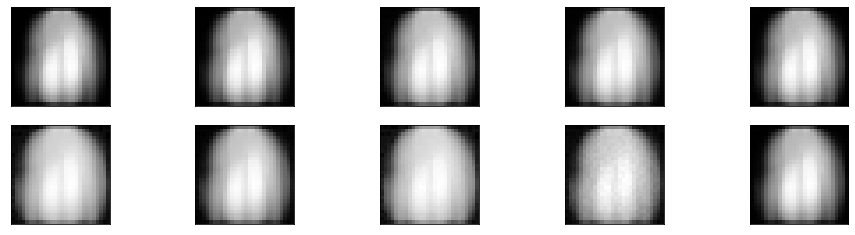

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 99)                77715     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               78400     
Total params: 156,115
Trainable params: 156,115
Non-trainable params: 0
_________________________________________________________________
99 Neuronas


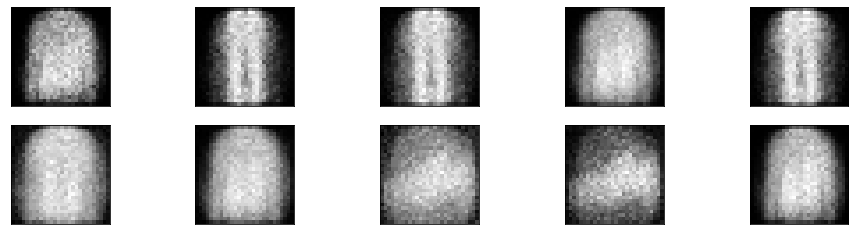

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 197)               154645    
_________________________________________________________________
dense_7 (Dense)              (None, 784)               155232    
Total params: 309,877
Trainable params: 309,877
Non-trainable params: 0
_________________________________________________________________
197 Neuronas


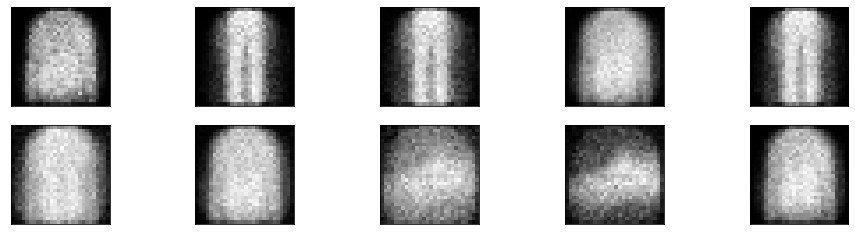

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 294)               230790    
_________________________________________________________________
dense_9 (Dense)              (None, 784)               231280    
Total params: 462,070
Trainable params: 462,070
Non-trainable params: 0
_________________________________________________________________
294 Neuronas


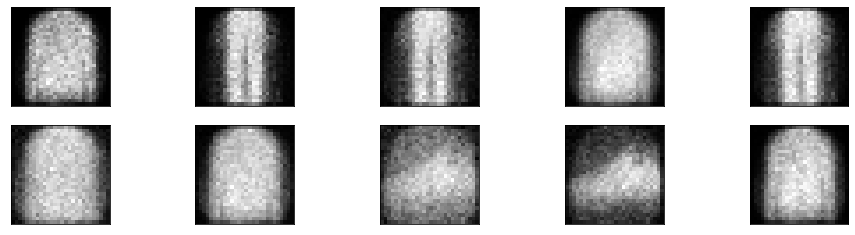

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 392)               307720    
_________________________________________________________________
dense_11 (Dense)             (None, 784)               308112    
Total params: 615,832
Trainable params: 615,832
Non-trainable params: 0
_________________________________________________________________
392 Neuronas


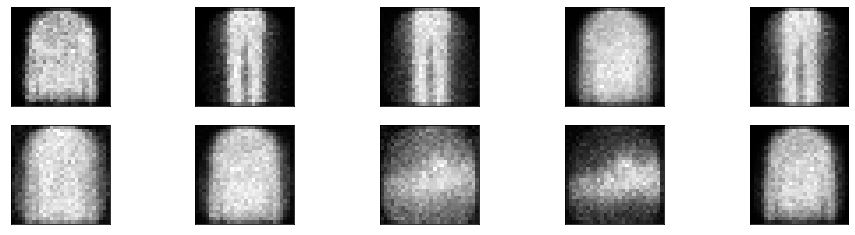

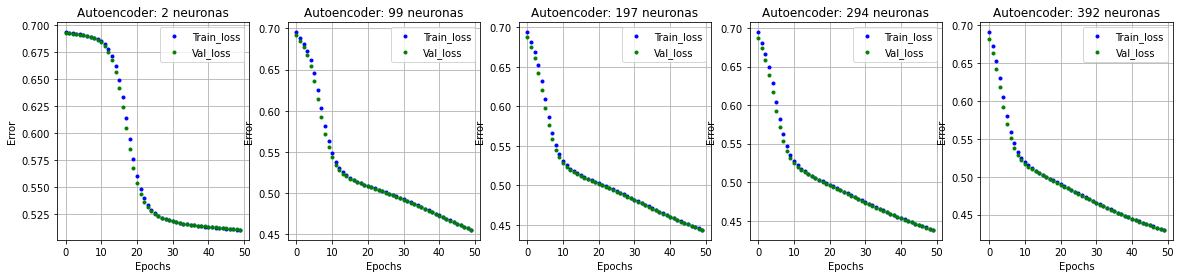

In [7]:
neurons= [2, 99, 197, 294 , 392]
hists = []

for i in range(5):
  autoencoder = Sequential()

  autoencoder.add(Dense(neurons[i],activation='relu')) # encoder

  autoencoder.add(Dense(28*28,activation= 'sigmoid')) #decoder

  autoencoder.compile(optimizer=SGD(lr=0.002),loss='binary_crossentropy')
  history = autoencoder.fit(x_train_vector_scaled,x_train_vector_scaled,epochs=50,validation_data=(x_val_vector_scaled,x_val_vector_scaled),verbose=False)
  hists.append(history)

  autoencoder.summary()

  plt.rcParams["figure.figsize"]=[16,4]
  ix = 1
  print(str(neurons[i]) + " Neuronas")
  for u in range(5):
    for v in range(2):
      ax = plt.subplot(2,5,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(autoencoder.predict(x_val_vector_scaled)[ix].reshape(28,28))
      ix += 1
  plt.show()


for i in range(5):
  plt.rcParams["figure.figsize"]=[20,4]
  plt.subplot(1, 5 ,i + 1)
  plt.title("Autoencoder: " + str(neurons[i])+" neuronas")
  plt.plot(hists[i].history["loss"],"b.",label="Train_loss")
  plt.plot(hists[i].history["val_loss"],"g.",label="Val_loss")
  plt.xlabel("Epochs"),plt.ylabel("Error")
  plt.legend(),plt.grid()

plt.show()

  

**Observaciones** 

Se utilizaron las neuronas [2, 99, 197, 294 , 392].

De los gráficos se puede observar que la pérdida disminuye a medida que se aumentan las neuronas, siendo las imágenes reconstruidas siguen siendo de mala calidad, aunque con 2 neuronas todas las imágenes parecen iguales. Se ve además, que la imagen reconstruida mejora cuando se utiliza una red que cuenta con más neuronas, esto puede deberse a la compresión que se le está aplicando, si se utilizan dos neuronas para aprender imágenes de 28x28, es seguro que habrá sobreajuste.

Además, en los gráficos se ve que a medida que se aumentan las neuronas se va quebrando antes la curva, es decir, toman menos epochs para que disminuya el error, por lo que se ve que en este caso hay una relación directa entre el número de epochs y neuronas.

Otro punto importante que destacar es que la perdida de validación y entrenamiento no varían mucho entre ellas, ya que a la escala de los graficos parecen superpuestas, sin embargo, en la pregunta anterior tienen una leve variación en algunas partes del intervalo de epochs.

## 3.e) Deep autoencoder

Pruebe ahora con una arquitectura ligeramente más profunda. Para esto utilice a lo menos 3 capas de encoding, es decir, 3 capas que progresivamente reduzcan la dimensionalidad de la representación hasta una dimensión objetivo inicialmente igual a la mejor obtenida en la pregunta anterior. Utilice igualmente a lo menos 2 capas de decoding, que se encarguen de aumentar la dimensionaliad de la representación hasta alcanzar la dimensión de la imagen original. Note que las primeras capas no necesariamente deben tener menor dimensionalidad que la imagen, la dimensión relevante es aquella de la última capa de encoding. 

Una vez esté satisfecho con su arquitectura profunda, varíe la dimensión objetivo de la última capa de encoding, realizando una exploración similar a la pregunta anterior. Utilice gráficos y muestre algunas imágenes reconstruidas para complementar sus comentarios. 

**Preguntas:**

i) ¿Cómo aumenta el número de parámetros entrenables? ¿Aumenta el tamaño de la representación "comprimida"?

ii) ¿Puede obtener una representación de menor dimensionalidad que la encontrada en el item anterior sin perder calidad en las imagenes obtenidas?

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_13 (Dense)             (None, 588)               461580    
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 1178      
_________________________________________________________________
dense_15 (Dense)             (None, 588)               1764      
_________________________________________________________________
dense_16 (Dense)             (None, 784)               461776    
Total params: 1,541,738
Trainable params: 1,541,738
Non-trainable params: 0
_________________________________________________________________
2 Neuronas


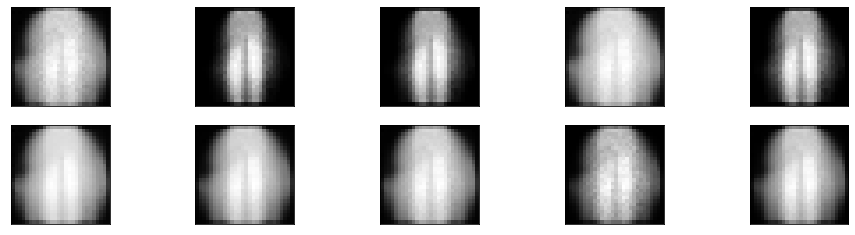

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_18 (Dense)             (None, 588)               461580    
_________________________________________________________________
dense_19 (Dense)             (None, 99)                58311     
_________________________________________________________________
dense_20 (Dense)             (None, 588)               58800     
_________________________________________________________________
dense_21 (Dense)             (None, 784)               461776    
Total params: 1,655,907
Trainable params: 1,655,907
Non-trainable params: 0
_________________________________________________________________
99 Neuronas


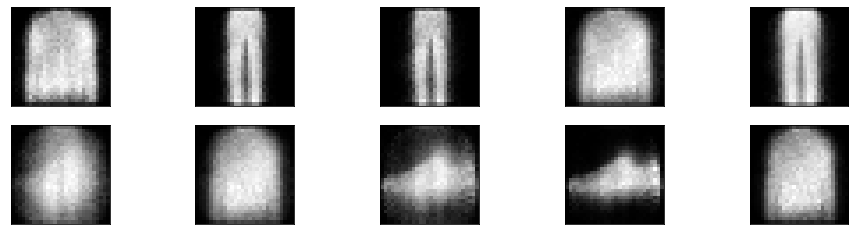

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_23 (Dense)             (None, 588)               461580    
_________________________________________________________________
dense_24 (Dense)             (None, 197)               116033    
_________________________________________________________________
dense_25 (Dense)             (None, 588)               116424    
_________________________________________________________________
dense_26 (Dense)             (None, 784)               461776    
Total params: 1,771,253
Trainable params: 1,771,253
Non-trainable params: 0
_________________________________________________________________
197 Neuronas


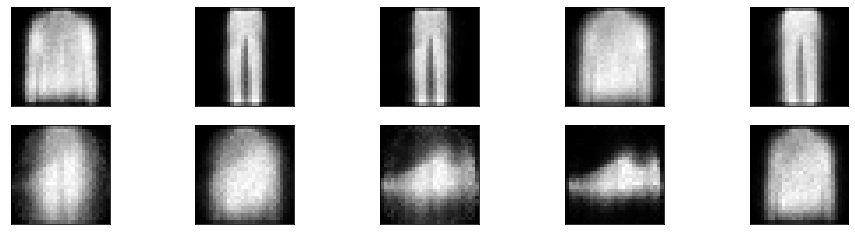

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_28 (Dense)             (None, 588)               461580    
_________________________________________________________________
dense_29 (Dense)             (None, 294)               173166    
_________________________________________________________________
dense_30 (Dense)             (None, 588)               173460    
_________________________________________________________________
dense_31 (Dense)             (None, 784)               461776    
Total params: 1,885,422
Trainable params: 1,885,422
Non-trainable params: 0
_________________________________________________________________
294 Neuronas


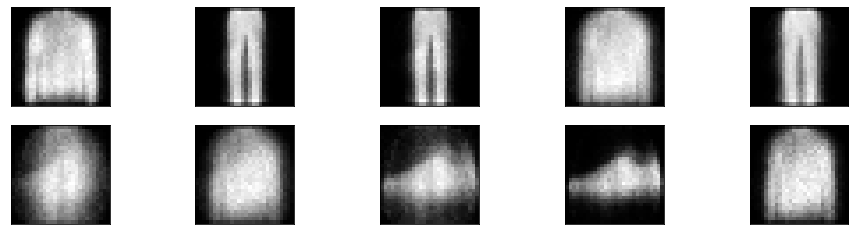

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_33 (Dense)             (None, 588)               461580    
_________________________________________________________________
dense_34 (Dense)             (None, 392)               230888    
_________________________________________________________________
dense_35 (Dense)             (None, 588)               231084    
_________________________________________________________________
dense_36 (Dense)             (None, 784)               461776    
Total params: 2,000,768
Trainable params: 2,000,768
Non-trainable params: 0
_________________________________________________________________
392 Neuronas


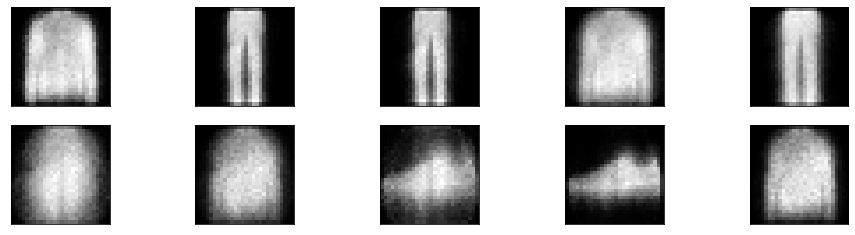

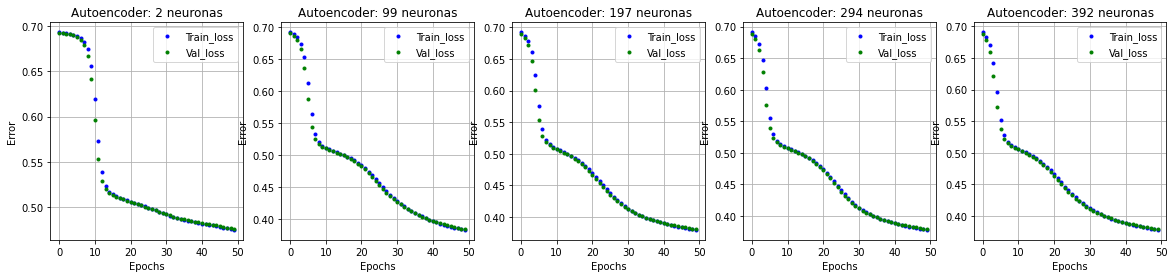

In [8]:
neurons= [2, 99, 197, 294 , 392]
hists = []

for i in range(5):
  autoencoder = Sequential()
  autoencoder.add(Dense(28*28,activation='relu')) # encoder
  autoencoder.add(Dense(588,activation= 'relu')) # encoder
  autoencoder.add(Dense(neurons[i],activation='relu')) # encoder
  autoencoder.add(Dense(588,activation='relu')) # decoder
  autoencoder.add(Dense(28*28,activation= 'sigmoid')) # decoder

  autoencoder.compile(optimizer=SGD(lr=0.002),loss='binary_crossentropy')
  history = autoencoder.fit(x_train_vector_scaled,x_train_vector_scaled,
                            epochs=50,
                            validation_data=(x_val_vector_scaled,x_val_vector_scaled),
                            verbose=False)
  hists.append(history)
  autoencoder.summary()

  print(str(neurons[i]) + " Neuronas")
  plt.rcParams["figure.figsize"]=[16,4]
  ix = 1
  for u in range(5):
    for v in range(2):
      ax = plt.subplot(2,5,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(autoencoder.predict(x_val_vector_scaled)[ix].reshape(28,28))
      ix += 1
  plt.show()

for i in range(5):
  plt.rcParams["figure.figsize"]=[20,4]
  plt.subplot(1, 5 ,i + 1)
  plt.title("Autoencoder: " + str(neurons[i])+" neuronas")
  plt.plot(hists[i].history["loss"],"b.",label="Train_loss")
  plt.plot(hists[i].history["val_loss"],"g.",label="Val_loss")
  plt.xlabel("Epochs"),plt.ylabel("Error")
  plt.legend(),plt.grid()

plt.show()

**Comentarios**

El Deep autoencoder lo hace mejor solo un autoencoder, esto se debe a que al progresivamente reducir la dimensionalidad evita que la red este sobreajustando, obteniendo mejores resultados.

**Respuestas**

i) ¿Cómo aumenta el número de parámetros entrenables? ¿Aumenta el tamaño de la representación "comprimida"?

Los parámetro entrenables aumentan de 3.922 a 1.541.738, por lo que se puede concluir que aumenta considerablemente. No aumenta, ya que lo importante es el resultado de la representación del encoder, esto es de dimensión 2 en ambos casos.

ii) ¿Puede obtener una representación de menor dimensionalidad que la encontrada en el item anterior sin perder calidad en las imagenes obtenidas?

Si se puede, ya que en ambos casos se tiene una capa con 2 neuronas, esto quiere decir que se redujo la dimensión a 2 neuronas, pero en este caso se redujo dimensionalidad más lento por lo que la imagen no perdió tanta calidad (debido a que no hay tanto overfitting)

## 3.f) Convolutional Autoencoder

Como hemos hasta ahora  utilizado una arquitectura fully connected, nuestra red no toma en cuenta la infomación local contenida en la proximidad de un pixel en la imagen. Como vimos en la tarea anterior, esta información podría ser crucial al momento de procesar imágenes. 

En este item deberá implementar un autoencoder convolucional. La sección de encoding de la red se creará de igual manera que las redes convolucionales creadas en la tarea 1. Puede utilizar capas de Max Pooling o Strides mayores a 1 para reducir la dimensionalidad en esta etapa. Tenga en mente como varía la dimensión de la imagen a lo largo del proceso. 

Para luego recuperar la dimensionalidad de la imagen original debemos utilizar una capa llamada usualmente como "Deconvolution Layer". Esta capa realiza el proceso inverso que aquel realizado por una capa convolucional, por lo cual utilizando por ejemplo `stride=2` puede duplicar la dimensionalidad de su input. 

Puede realizar la profundidad que desee, pero tome en cuenta que una mayor profundidad de la sección convolucional permite a la red reducir dimensionalidad más lentamente, sin "forzar" la compresión de las características. Note que para reconstruir la dimensión original puede usar `output_padding` para corregir problemas de paridad, entre otros. 

Puede igualmente optar por usar algun número de capas densas en el cuello de botella del autoencoder, usando al comienzo de esta una capa `Flatten` y al final de ella una capa `Reshape` (`keras.layers.Reshape(target_shape)`) para recuperar la bidimensionalidad.

¡No olvide que para entrenar esta red debe usar la versión bidimensional de los datos escalados!

Visualice que tan bien se comporta la convolución, en terminos de la función de pérdida y visualizando las imagenes reconstruidas. Compárese con la red densa. 

In [16]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras.layers import Dense
from keras.optimizers import SGD
from keras.models import Sequential
conv=Sequential()
x_train_vector_scaled = x_train_vector_scaled.reshape(60000,28,28,1)
x_val_vector_scaled = x_val_vector_scaled.reshape(10000,28,28,1)

#E
conv.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu',input_shape=(28,28,1)))
conv.add(MaxPooling2D(pool_size=(2,2)))
conv.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu',input_shape=(28,28,1)))
conv.add(MaxPooling2D(pool_size=(2,2)))

#D
conv.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu'))
conv.add(UpSampling2D((2, 2)))
conv.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
conv.add(UpSampling2D((2, 2)))
conv.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))
'''conv.add(Flatten())    
conv.add(Dense(units=28*28, activation='sigmoid')) # output
conv.add(Reshape((28, 28)))'''


conv.compile(optimizer=SGD(lr=0.002),loss='binary_crossentropy')
history = conv.fit(x_train_vector_scaled,x_train_vector_scaled,epochs=50,validation_data=(x_val_vector_scaled,x_val_vector_scaled),verbose=False)

**Visualización**

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 16)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


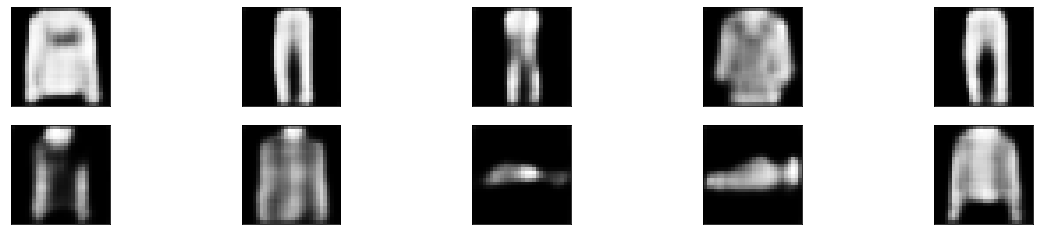

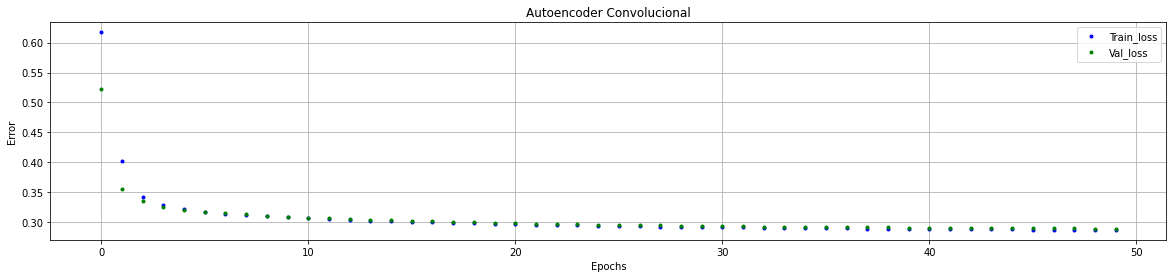

In [17]:
conv.summary()

plt.figure(figsize=(20, 4))
for i in range(n):
  plt.rcParams["figure.figsize"]=[16,4]
  ix = 1
  for u in range(5):
    for v in range(2):
      ax = plt.subplot(2,5,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(conv.predict(x_val_vector_scaled)[ix].reshape(28,28))
      ix += 1
plt.show()

plt.rcParams["figure.figsize"]=[20,4]

# Primer Autoenconder
plt.subplot(1,1,1)
plt.title("Autoencoder Convolucional")
plt.plot(history.history["loss"],"b.",label="Train_loss")
plt.plot(history.history["val_loss"],"g.",label="Val_loss")
plt.xlabel("Epochs"),plt.ylabel("Error")
plt.legend(),plt.grid()

plt.show()

**Observaciones**

Las imágenes se distinguen mejor comparado con la red Densa y el error es menor, en el mejor de los casos en la red Densa se tenia un error superior a 0.3, pero en la red convolucional es menor que 0.3. Otras imágenes tienen más sectore negros que muestran que la red no reconoce eso como un patrón importante, quedando casi indistinguibles en la red convolucional.

Otra gran ventaja de esta red convolucional es que ocupa 3,217 parámetros, una cantidad mucho menor a la red densa que a los 2,000,768 parámetros utilizados por la red densa con mejor desempeño.

Por lo que se puede concluir es que es mejor utilizar las redes convolucionales para reconocer patrones en las imágenes.

## 3.g) Denoising Autoencoder 

Otra utilidad que se le ha dado a los autoencoders es la posibilidad de utilizarlos para separar ruido de información. Para entrenar tal tipo de modelo, la idea es simple: utilizar como datos de entrada imagenes a las cuales se les ha agregado artificialmente ruido y como objetivo la imagen original sin ruido. 

Entrene alguna arquitectura de autoencoder que le parezca apropiada para la tarea utilizando algún tipo de ruido aleatorio. Puede utilizar cambios en valores de pixeles aleatoriamente, o por ejemplo "promediar" ponderadamente la imagen original con alguna otra imagen del dataset ligeramente modificada. Puede utilizar las librerías `random` de `numpy`. Sea creativo, puede crear el ruido que desee. Idealmente, considerando la naturaleza del problema que se buscaría modelar (eliminar ruido real de mediciones), la naturaleza del ruido agregado debe ser estocástica y no puede "repetirse" el mismo patrón de ruido a lo largo de todo el entrenamiendo, es decir, si agregó un ruido estocástico a cada imágen del conjunto, este proceso debe iterarse igualmente luego de cada época de entrenamiento, para evitar que la red aprenda un patrón especifico de ruido, si no aprenda realmente a diferenciar ruido sin información de la información suyaciente a la imagen. 

Una vez esté satisfecho con la red, muestre ejemplos de la imagen con ruido, la imagen original y la imagen reconstruida. Pruebe igualmente entregarle a la red nuevas.

In [19]:
noise_factor = 0.2
x_train_noise = x_train_vector_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_vector_scaled.shape) 
x_val_noise = x_val_vector_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_val_vector_scaled.shape) 

x_train_noise = np.clip(x_train_noise, 0., 1.)
x_val_noise = np.clip(x_val_noise, 0., 1.)

history = conv.fit(x_train_noise,x_train_vector_scaled,epochs=50,validation_data=(x_val_noise,x_val_vector_scaled), verbose=False)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 16)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


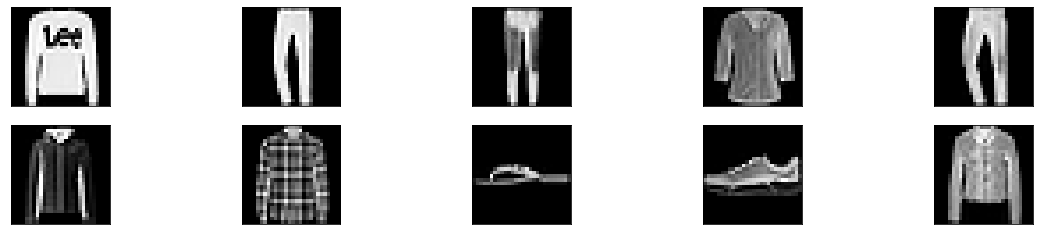

Imágenes con ruido


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


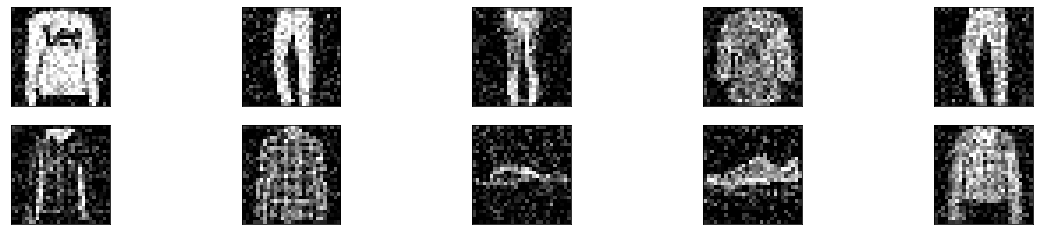

Imágenes reconstruidas


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


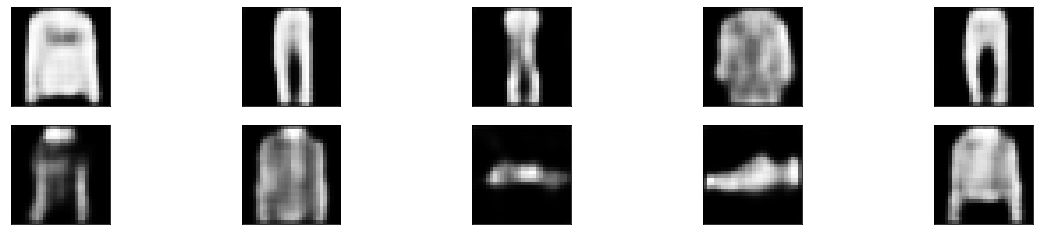

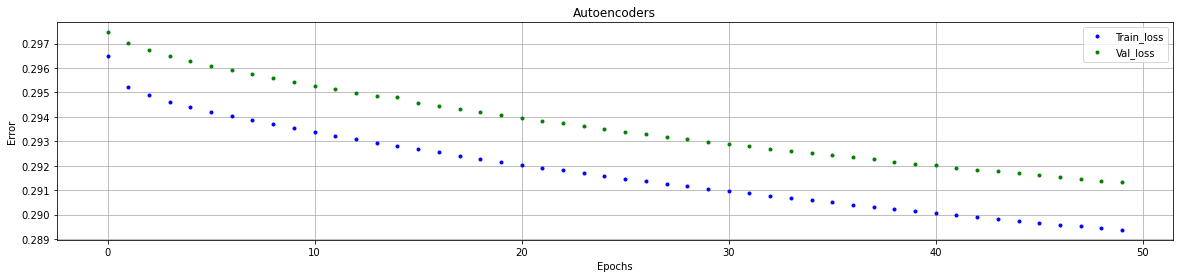

In [21]:
conv.summary()

print("Imágenes originales")
plt.figure(figsize=(20, 4))
for i in range(n):
  plt.rcParams["figure.figsize"]=[16,4]
  ix = 1
  for u in range(5):
    for v in range(2):
      ax = plt.subplot(2,5,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(x_val_vector_scaled[ix].reshape(28,28))
      ix += 1
plt.show()

print("Imágenes con ruido")
plt.figure(figsize=(20, 4))
for i in range(n):
  plt.rcParams["figure.figsize"]=[16,4]
  ix = 1
  for u in range(5):
    for v in range(2):
      ax = plt.subplot(2,5,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(x_val_noise[ix].reshape(28,28))
      ix += 1
plt.show()

print("Imágenes reconstruidas")
plt.figure(figsize=(20, 4))
for i in range(n):
  plt.rcParams["figure.figsize"]=[16,4]
  ix = 1
  for u in range(5):
    for v in range(2):
      ax = plt.subplot(2,5,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(conv.predict(x_val_noise)[ix].reshape(28,28))
      ix += 1
plt.show()

plt.rcParams["figure.figsize"]=[20,4]

# Primer Autoenconder
plt.subplot(1,1,1)
plt.title("Autoencoders")
plt.plot(history.history["loss"],"b.",label="Train_loss")
plt.plot(history.history["val_loss"],"g.",label="Val_loss")
plt.xlabel("Epochs"),plt.ylabel("Error")
plt.legend(),plt.grid()

plt.show()

**Comentarios**

En las imágenes mostradas se logra apreciar que aún con ruido, se logra reconstruir bien la imagen, teniendo un resultado bastante cercano a la original, sin embargo, el ruido utilizado se puede considerar pequeño. El error de clasificación se mantiene igual que en los casos anteriores.

Se decidió utilizar la red densa debido a que se sospechaba que no lograría reconstruir bien las imágenes, sin embargo, lo hizo bastante bien.

Además, se destaca que en este caso el error de validación se diferencia bastante del error de entrenamiento, esto puede deberse a que la escala es pequeña [0.290, 0.297]. 

## 3.h) Generación de imágenes

Otra utilización posible que podría darse, quizás, a los autoencoders, es utilizar los decoders para generar nuevas imágenes. La idea de esto sería considerar que la habilidad que tiene la sección decoder de generar una imágen a partir de una representación de menor dimensionalidad puede aprovecharse. 

Para esto, extraiga la sección de encoding y la sección de decoding de alguno de los autoencoders entrenados que prefiera. Obtenga los valores de la representación interna de las imágenes usando el encoder para calcularlos. Luego agréguele a esta representación algún ruido de su preferencia, y calcule la imágen resultante utilizando el decoder. ¿Qué observa? Muestre las imágenes obtenidas junto con otras imágenes de la misma categoría que la imágen que utilizó originalmente. Pruebe con distintos valores de ruido.

Pruebe también, por ejemplo, calcular la imágen obtenida al promediar las representaciones comprimidas de varias (o todas) las imágenes de una clase. Utilice el encoder para generar imágenes a partir de otros valores que se les ocurran y especule sobre el por qué la imágen obtenida se asimila o no a las imágenes del dataset. 

In [24]:
x_train_vector_scaled = x_train_vector_scaled.reshape(60000,784)
x_val_vector_scaled = x_val_vector_scaled.reshape(10000,784)

# Encoder
encoder = Sequential()
encoder.add(Dense(28*28,activation='relu'))
encoder.add(Dense(588,activation= 'relu'))
encoder.add(Dense(392,activation='relu'))

# Decoder
decoder = Sequential()
decoder.add(Dense(392,activation='relu'))
decoder.add(Dense(28*28,activation= 'sigmoid'))


autoencoder = Sequential([encoder, decoder])
autoencoder.compile(optimizer=SGD(lr=0.002),loss='binary_crossentropy')
history = autoencoder.fit(x_train_vector_scaled,x_train_vector_scaled,epochs=50,validation_data=(x_val_vector_scaled,x_val_vector_scaled),verbose=False)

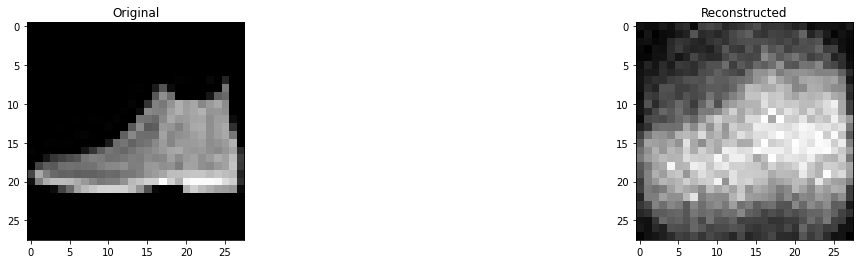

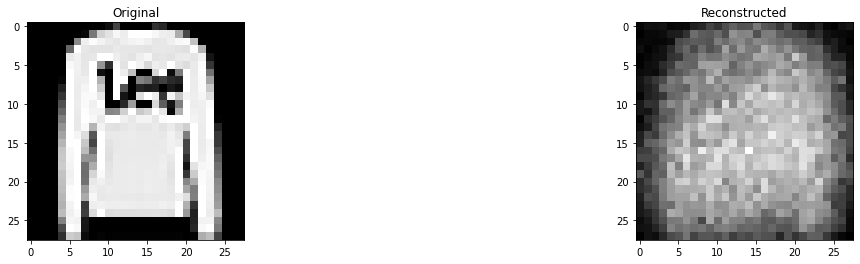

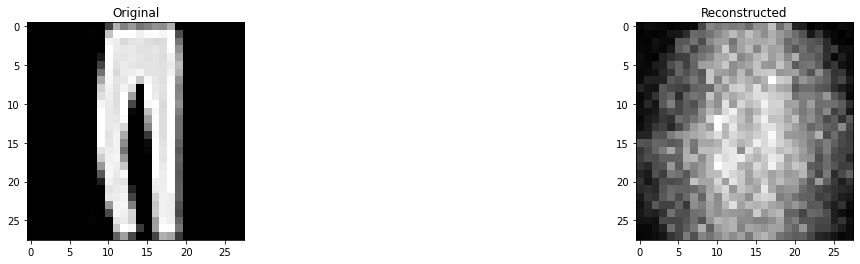

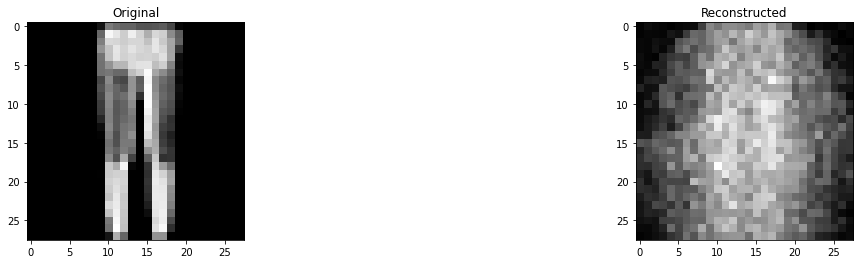

In [25]:
noise_factor = 0.6
for i in range(4):
    img = x_val_vector_scaled[i]
    noise_factor -= 0.1
    rep = encoder.predict(img[None])[0]
    rep_noise = rep + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=rep.shape) 
    rep_noise = np.clip(rep_noise, 0., 1.)
    new_img = decoder.predict(rep_noise[None])[0]

    plt.subplot(1,2,1)
    plt.title("Original")
    plt.imshow(img.reshape(28,28))


    plt.subplot(1,2,2)
    plt.title("Reconstructed")
    plt.imshow(new_img.reshape(28,28))
    plt.show()

[ 1  2  4 10 17 26 34 48 61 64]


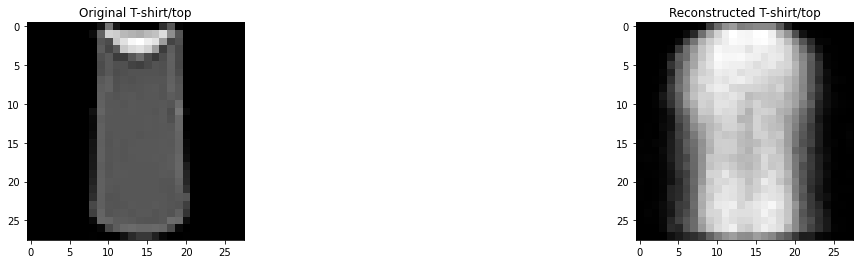

[16 21 38 69 71 74 78 80 86 97]


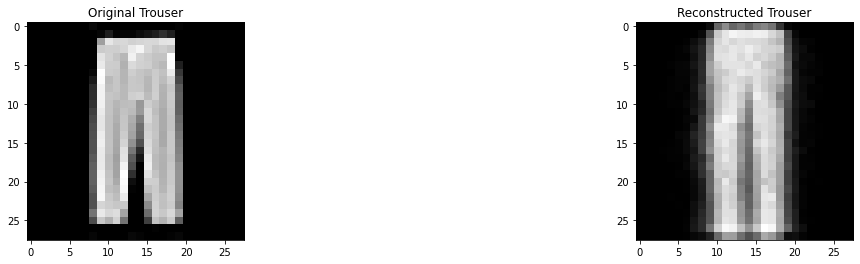

[  5   7  27  37  45  53  54  65  92 123]


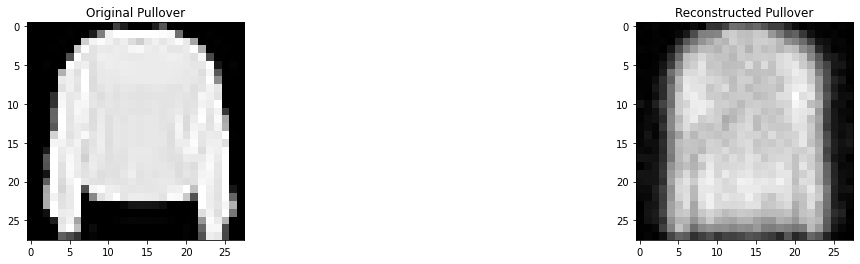

[ 3 20 25 31 47 49 50 51 58 59]


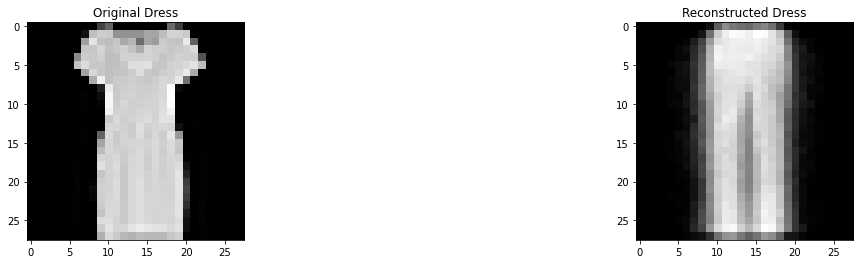

[ 19  22  24  28  29  68  75  76  96 117]


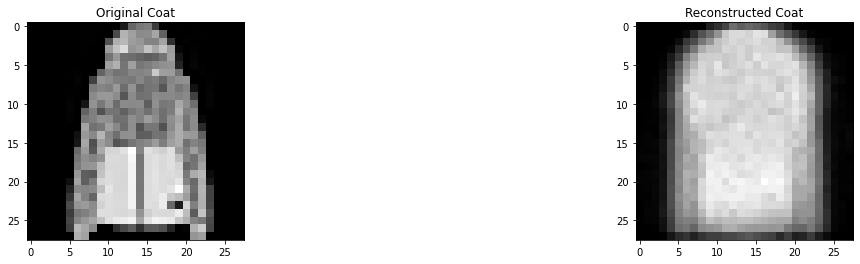

[ 8  9 12 13 30 36 43 60 62 63]


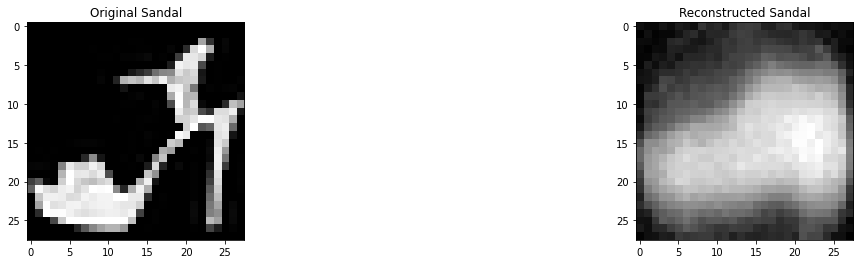

[18 32 33 39 40 55 56 72 77 95]


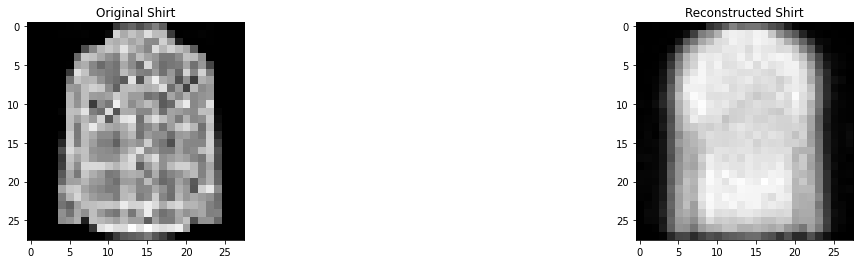

[  6  14  41  46  52  83  85  87 108 119]


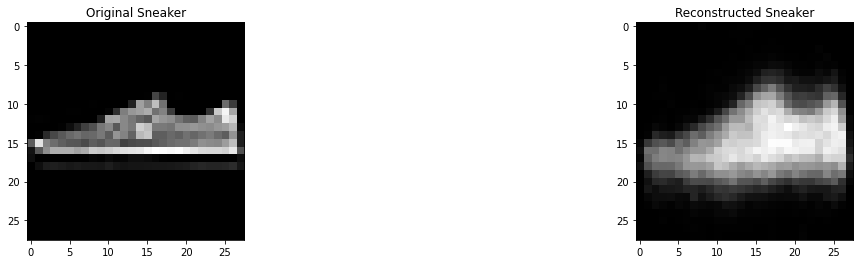

[ 23  35  57  99 100 105 109 110 130 144]


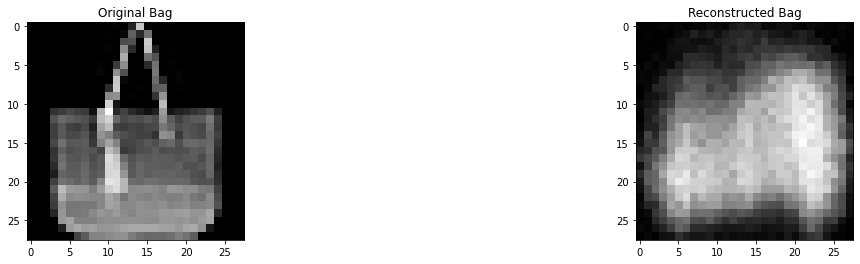

[ 0 11 15 42 44 79 84 88 89 90]


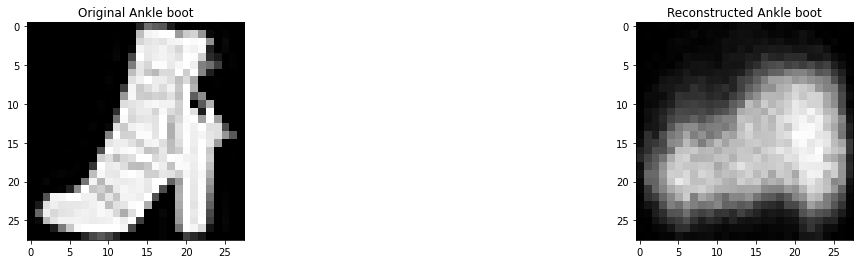

In [66]:
def img_mean(x_tr, index):
  img = np.zeros((784))
  for i in range(10):
    img[:] += x_tr[index[i]]
  img = img/10
  return img

n=10
for i in range(n):
  # Se toman las 10 primeras prendas de una clase
  clothes = np.where(y_tr == i)[0][:10]
  print(clothes)
  img = img_mean(x_train_vector_scaled, clothes)
  rep = encoder.predict(img[None])[0]
  new_img = decoder.predict(rep[None])[0]

  plt.subplot(1,2,1)
  plt.title("Original " + str(y[y_tr[clothes[0]]]))
  plt.imshow(x_train_vector_scaled[clothes[1]].reshape(28,28))


  plt.subplot(1,2,2)
  plt.title("Reconstructed " + str(y[y_tr[clothes[0]]]))
  plt.imshow(new_img.reshape(28,28))
  plt.show()

**Comentarios**

Cuando se realizó la reconstrucción sin agregar ruido, no generó un problema, la imagen se veía solo más difuminada. Sin embargo, cuando se agrego ruido a la representación generada por el encoder y luego se reconstruyó, las imágenes finales terminaron con demasiado ruido. Esto se debe a que tiene 2 capas para corregir ese ruido, a diferencia del caso anterior que contaba con las capas del encoder.

Por otra parte, el promedio de las clases generó una imagen menos difuminada que la anterior, aún así en algunas clases si esta difuminado, por lo que la construcción no fue perfecta. Esto se debe a que los distintos tipos de ropa tiene formas muy distintas, por lo tanto al sacar el promedio de imágenes se reconstruyen imágenes algo borrosas porque se combinan las imágenes.
